# Robust Identification and Inference in Repeated Game

In [1]:
from IPython.display import display, Math
from RIIRG_lib import Robust_Identification
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

## The econometric problem

Consider the following infinitely repeated $2 \times 2$ game. In each period, players choose whether to play $C$ or play $D$. The matrix of stage-game payoffs is given by

<center><img src="payoff_mat.png"/></center>

The unknown utility parameter is $\beta \in (1/2, 2)$ and in each period there is a shock $\omega_t$ to the payoff. The common discount factor is $\delta \in (0,1).$ The quality of the monitoring structure is $\eta \in [0,1]$. The goal of the researcher is to estimate $\lambda \coloneqq (\beta,\eta,\delta)$ or any of their combinations using data on the frequencies of various action profiles. The researcher knows that $\beta \in (1/2, 2)$ and $\omega_t \sim \mathcal{U}(-1/2, 1/2)$ and assume that observed actions (or outcomes) are a result of perfect public equilibrium play in the infinitely repeated game.

The code below specify a fineness for the grid necessary to discretize the parameter space. It is also given a probability distribution over action profile:

$$( \mathbb{P}(C,C), \mathbb{P}(C,D), \mathbb{P}(D,C), \mathbb{P}(D, D) ) = ( 0.7, 0.1, 0.1, 0.1 )$$



In [26]:
grid = 40
game = Robust_Identification([0.7, 0.1, 0.1, 0.1])

Once a grid and a probability distribution is specified, the function identify is called in order to perform the identification routine

In [27]:
ID_set, B, Δ, H = game.identify(grid)

Here is a plot of the identified set

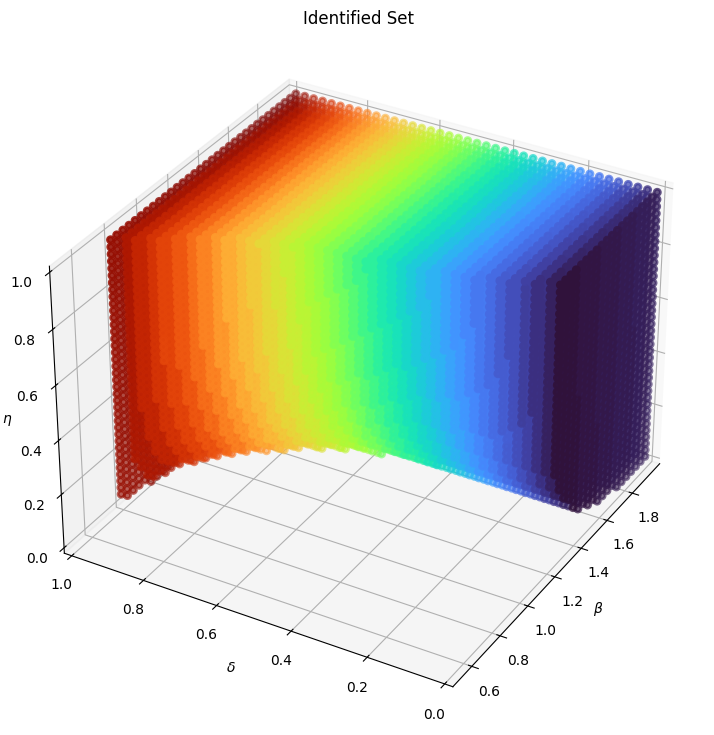

In [29]:
fig = plt.figure(figsize=(16, 9), dpi=100)
ax = fig.add_subplot(projection='3d')

plt.title("Identified Set")

# Color map
color_values = np.linspace(0, 1, int(np.sum(ID_set)))
cmap = plt.cm.turbo # Choose a colormap
norm = Normalize(vmin=color_values.min(), vmax=color_values.max())

# Plot
ax.scatter(B[ID_set.astype(bool)], Δ[ID_set.astype(bool)], H[ID_set.astype(bool)], c=color_values, cmap=cmap, norm=norm, linewidth=2)

ax.set_xlim([0.5, 1.99])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])
ax.view_init(elev=32, azim=-150, roll=0)
ax.zaxis.labelpad=-0.7

ax.xaxis.set_rotate_label(False)
ax.yaxis.set_rotate_label(False)
ax.zaxis.set_rotate_label(False)

ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'$\delta$')
ax.set_zlabel(r'$\eta$')
plt.show()